In [33]:
import json 
import pandas as pd
from tqdm import tqdm
import numpy as np
import os
import matplotlib.pyplot as plt

files = os.listdir('../Data/Analysed')

datas = []
players = {}
all_obs = [] 
games = []
# playername, rating, difference, time 
for file in tqdm(files):
    with open('../Data/Analysed/' + file) as f:
        data = json.load(f)
    
    white_moves_time, black_moves_time = data["game"]["moveTimestamps"].split(",")[:-1][::2], data["game"]["moveTimestamps"].split(",")[:-1][1::2]
    white_moves_time, black_moves_time = [int(x)/10 for x in white_moves_time], [int(x)/10 for x in black_moves_time]
    time_diffs_white, time_diffs_black = [0] + list(np.diff(white_moves_time)), [0] + list(np.diff(black_moves_time))
    
    user_black = data["players"]["top"]["username"]
    user_white = data["players"]["bottom"]["username"]
    rating_black = data["players"]["top"]["rating"]
    rating_white = data["players"]["bottom"]["rating"]

    white_loss = [x["difference"] for x in data["evaluations"] if x["player"] == "white"]
    black_loss = [x["difference"] for x in data["evaluations"] if x["player"] == "black"]
    white_loss_after_10 = np.median(white_loss[10:])
    black_loss_after_10 = np.median(black_loss[10:])
    white_loss = np.median(white_loss)
    black_loss = np.median(black_loss)
    white_perc_best_move = np.mean([x["Ranking Real Move"] == 1 for x in data["evaluations"] if x["player"] == "white"])
    black_perc_best_move = np.mean([x["Ranking Real Move"] == 1 for x in data["evaluations"] if x["player"] == "black"])
    white_perc_very_good_move = np.mean([x["Ranking Real Move"] <= 3 for x in data["evaluations"] if x["player"] == "white"])
    black_perc_very_good_move = np.mean([x["Ranking Real Move"] <= 3 for x in data["evaluations"] if x["player"] == "black"])

    white_perc_best_move_after_10 = np.mean([x["Ranking Real Move"] == 1 for x in data["evaluations"][10:] if x["player"] == "white"])
    black_perc_best_move_after_10 = np.mean([x["Ranking Real Move"] == 1 for x in data["evaluations"][10:] if x["player"] == "black"])
    # Ranking Real Move (if -1 => 10)
    avg_rank_white = np.mean([x["Ranking Real Move"] if x["Ranking Real Move"] > 0 else 10 for x in data["evaluations"] if x["player"] == "white"])
    avg_rank_black = np.mean([x["Ranking Real Move"] if x["Ranking Real Move"] > 0 else 10 for x in data["evaluations"] if x["player"] == "black"])
    ranks_white = [x["Ranking Real Move"] if x["Ranking Real Move"] > 0 else 10 for x in data["evaluations"] if x["player"] == "white"]
    ranks_black = [x["Ranking Real Move"] if x["Ranking Real Move"] > 0 else 10 for x in data["evaluations"] if x["player"] == "black"]

    if user_black not in players:
        players[user_black] = {"games": 0, "loss": [], "loss_after_10": [], "perc_best_move": [], "perc_best_move_after_10": [], "rating": [], "avg_rank": [], "ranks": [], "very_good_move": []}
    if user_white not in players:
        players[user_white] = {"games": 0, "loss": [], "loss_after_10": [], "perc_best_move": [], "perc_best_move_after_10": [], "rating": [], "avg_rank": [], "ranks": [], "very_good_move": []}
    
    players[user_black]["games"] += 1
    players[user_white]["games"] += 1
    players[user_black]["loss"].append(black_loss)
    players[user_white]["loss"].append(white_loss)
    players[user_black]["loss_after_10"].append(black_loss_after_10)
    players[user_white]["loss_after_10"].append(white_loss_after_10)
    players[user_black]["perc_best_move"].append(black_perc_best_move)
    players[user_white]["perc_best_move"].append(white_perc_best_move)
    players[user_black]["perc_best_move_after_10"].append(black_perc_best_move_after_10)
    players[user_white]["perc_best_move_after_10"].append(white_perc_best_move_after_10)
    players[user_black]["rating"].append(rating_black)
    players[user_white]["rating"].append(rating_white)
    players[user_black]["avg_rank"].append(avg_rank_black)
    players[user_white]["avg_rank"].append(avg_rank_white)
    players[user_black]["ranks"].append(ranks_black)
    players[user_white]["ranks"].append(ranks_white)
    players[user_black]["very_good_move"].append(black_perc_very_good_move)
    players[user_white]["very_good_move"].append(white_perc_very_good_move)

    white_moves, black_moves = 0, 0
    for i in range(len(data["evaluations"])):
        white_moves += 1 if data["evaluations"][i]["player"] == "white" else 0
        black_moves += 1 if data["evaluations"][i]["player"] == "black" else 0
        all_obs.append({"player": user_black if i % 2 == 0 else user_white, 
                        "colour": 0 if i % 2 == 0 else 1,
                        "rating":  np.mean(players[user_black]["rating"]) if i % 2 == 0 else np.mean(players[user_white]["rating"]),
                        "difference": -np.abs(data["evaluations"][i]["Best Move Eval"] - data["evaluations"][i]["Real Move Eval"]),
                        "time": time_diffs_white[white_moves-1] if data["evaluations"][i]["player"] == "white" else time_diffs_black[black_moves-1],
                        "remaining_time": white_moves_time[white_moves-1] if data["evaluations"][i]["player"] == "white" else black_moves_time[black_moves-1],
                        "Ranking Real Move": data["evaluations"][i]["Ranking Real Move"],
                        "Move_Num" : white_moves if data["evaluations"][i]["player"] == "white" else black_moves,
                        "opponent": user_white if i % 2 == 0 else user_black,
                        "game_id": data["game"]["id"],
                        "oppenent_rating": np.mean(players[user_white]["rating"]) if i % 2 == 0 else np.mean(players[user_black]["rating"]),
                        "real_eval": data["evaluations"][i]["Real Move Eval"],
                        "best_eval": data["evaluations"][i]["Best Move Eval"]})

  0%|          | 0/6340 [00:00<?, ?it/s]Mean of empty slice.
invalid value encountered in scalar divide
100%|██████████| 6340/6340 [00:08<00:00, 747.57it/s]


In [35]:
all_obs_df = pd.DataFrame(all_obs)
all_obs_df["difference"] = all_obs_df["difference"] * -1

In [36]:
all_obs_df["blunder"] = all_obs_df["difference"] > 2

In [37]:
all_obs_df["blunder"] = all_obs_df["difference"] > 1
blunds = all_obs_df.groupby("player").agg({"blunder": "mean", "rating": "first", "difference": "size"}).reset_index()
blunds.columns = ["player", "blunder", "rating", "games"]
#blunds.sort_values("mean", ascending=True).head(50)


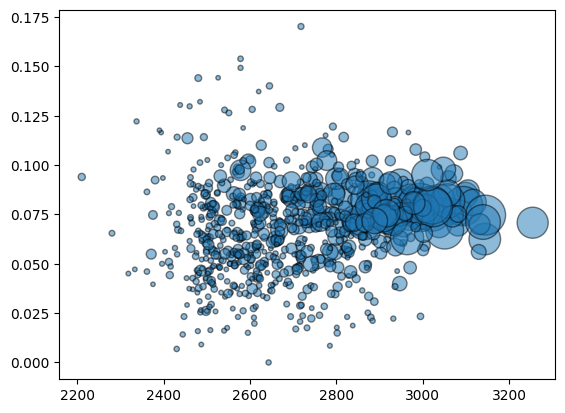

In [38]:
# Plot rating vs loss
import matplotlib.pyplot as plt
# size of each marker is proportional to the number of games played
plt.scatter(blunds.loc[blunds["games"] > 100,"rating"], blunds.loc[blunds["games"] > 100,"blunder"], s = [x/10 for x in blunds.loc[blunds["games"] > 100,"games"]], alpha=0.5, edgecolors="black")
# Black outline for each marker

(0.0, 5.0)

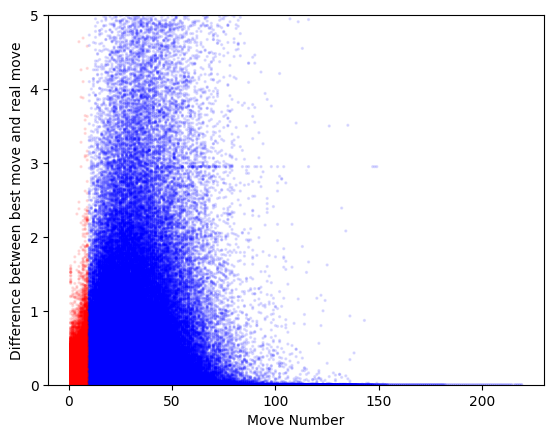

In [39]:

# Plot difference vs time
# Move_Num < 10 => Red, Move_Num > 10 => Blue 
plt.scatter(all_obs_df["Move_Num"], all_obs_df["difference"], c=all_obs_df["Move_Num"] < 10, cmap="bwr", alpha=0.1, s = 2)
plt.xlabel("Move Number")
plt.ylabel("Difference between best move and real move")
plt.ylim(0,5)


In [40]:
df = pd.DataFrame(players).T

In [41]:
def get_longest_1_count(l):        
    if len(l) < 11:
        return 0
    longest = 0
    current = 0
    for i in l[10:]:
        if i == 1:
            current += 1
        else:
            if current > longest:
                longest = current
            current = 0
    return longest

def get_longest_list_of_lists(x):
    if isinstance(x[0], list):
        return [get_longest_1_count(l) for l in x]
    else:
        return [get_longest_1_count(x)]
        

df["longest_first"] = df.ranks.apply(get_longest_list_of_lists)

In [42]:
# All columns except for "games" - are lists
# calculate the mean of each list
for col in df.columns:
    if col != "games" and col != "ranks":
        df[col] = df[col].apply(lambda x: np.mean(x))

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

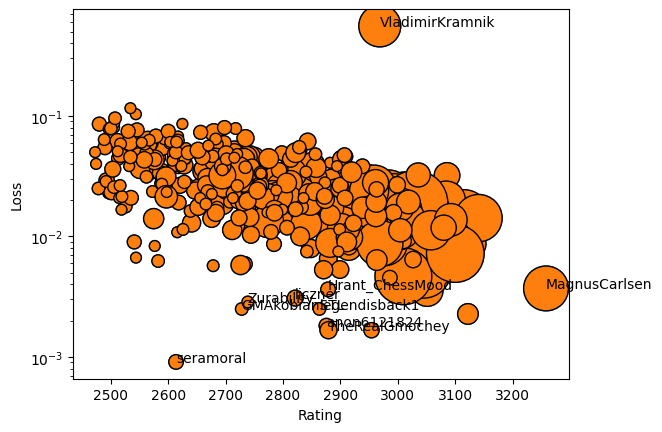

In [43]:
# Plot rating vs loss
import matplotlib.pyplot as plt
# size of each marker is proportional to the number of games played

plt.scatter(df.loc[df["games"] > 5, "rating"], df.loc[df["games"] > 5,"loss"], s= [10 * x for x in df.loc[df["games"] > 5,"games"].to_list()])
# Black outline for each marker
plt.scatter(df.loc[df["games"] > 5,"rating"], df.loc[df["games"] > 5,"loss"], s= [10 * x for x in df.loc[df["games"] > 5,"games"].to_list()], edgecolors="black")
# set y log
plt.yscale("log")
plt.ylabel("Loss")
plt.xlabel("Rating")

for i, txt in enumerate(df.loc[df["games"] > 5].index):
    if df.loc[df["games"] > 5,"rating"][i] > 3200:
        plt.annotate(txt, (df.loc[df["games"] > 5,"rating"][i], df.loc[df["games"] > 5,"loss"][i]), fontsize=10)
    if df.loc[df["games"] > 5,"loss"][i] > 0.5:
        plt.annotate(txt, (df.loc[df["games"] > 5,"rating"][i], df.loc[df["games"] > 5,"loss"][i]), fontsize=10)
    if df.loc[df["games"] > 5,"loss"][i] < 0.005 and df.loc[df["games"] > 5,"rating"][i] < 2900:
        plt.annotate(txt, (df.loc[df["games"] > 5,"rating"][i], df.loc[df["games"] > 5,"loss"][i]), fontsize=10)
    

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (con

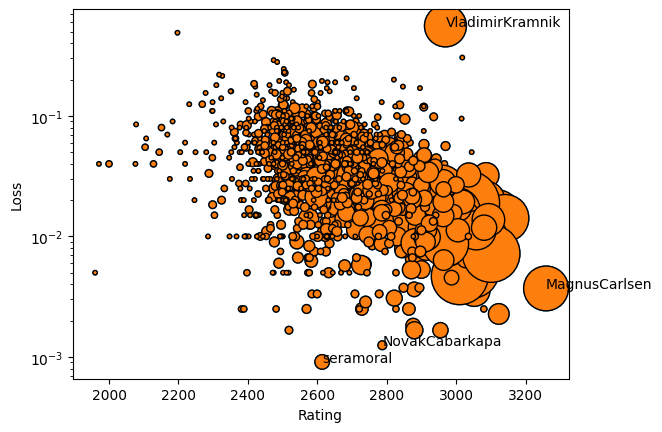

In [47]:
# Plot rating vs loss
import matplotlib.pyplot as plt
# size of each marker is proportional to the number of games played

plt.scatter(df["rating"], df["loss"], s= [10 * x for x in df["games"].to_list()])
# Black outline for each marker
plt.scatter(df["rating"], df["loss"], s= [10 * x for x in df["games"].to_list()], edgecolors="black")
# set y log
plt.yscale("log")
plt.ylabel("Loss")
plt.xlabel("Rating")

for i, txt in enumerate(df.index):
    if df["rating"][i] > 3200:
        plt.annotate(txt, (df["rating"][i], df["loss"][i]), fontsize=10)
    if df["loss"][i] > 0.5:
        plt.annotate(txt, (df["rating"][i], df["loss"][i]), fontsize=10)
    if df["loss"][i] < 0.0015 and df["rating"][i] < 2900:
        plt.annotate(txt, (df["rating"][i], df["loss"][i]), fontsize=10)

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


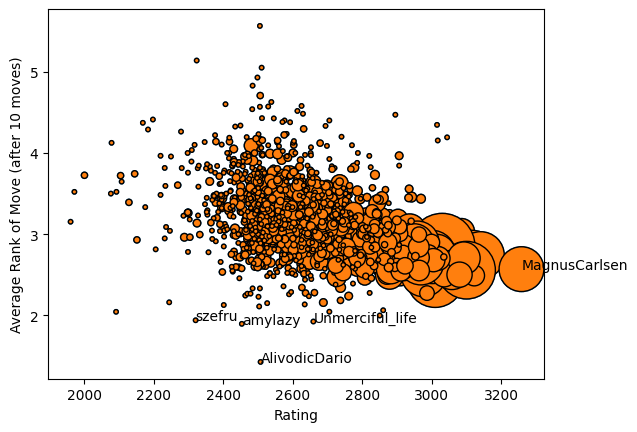

In [49]:
# Plot rating vs loss
import matplotlib.pyplot as plt
# size of each marker is proportional to the number of games played

plt.scatter(df["rating"], df["avg_rank"], s= [10 * x for x in df["games"].to_list()])
# Black outline for each marker
plt.scatter(df["rating"], df["avg_rank"], s= [10 * x for x in df["games"].to_list()], edgecolors="black")
plt.ylabel("Average Rank of Move (after 10 moves)")
plt.xlabel("Rating")


for i, txt in enumerate(df.index):
    if df["rating"][i] > 3200:
        plt.annotate(txt, (df["rating"][i], df["avg_rank"][i]), fontsize=10)
    if df["avg_rank"][i] < 2:
        plt.annotate(txt, (df["rating"][i], df["avg_rank"][i]), fontsize=10)

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


(0.3, 0.6)

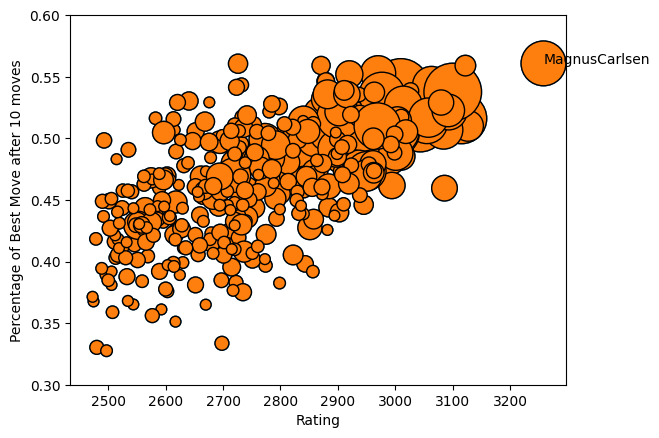

In [56]:
# Plot rating vs loss
import matplotlib.pyplot as plt
# size of each marker is proportional to the number of games played

plt.scatter(df.loc[df.games > 5, "rating"], df.loc[df.games > 5,"perc_best_move_after_10"], s= [10 * x for x in df.loc[df.games > 5,"games"].to_list()])
# Black outline for each marker
plt.scatter(df.loc[df.games > 5,"rating"], df.loc[df.games > 5,"perc_best_move_after_10"], s= [10 * x for x in df.loc[df.games > 5,"games"].to_list()], edgecolors="black")
plt.ylabel("Percentage of Best Move after 10 moves")
plt.xlabel("Rating")

for i, txt in enumerate(df.loc[df.games > 5].index):
    if df.loc[df.games > 5,"rating"][i] > 3200:
        plt.annotate(txt, (df.loc[df.games > 5,"rating"][i], df.loc[df.games > 5,"perc_best_move_after_10"][i]), fontsize=10)
    if df.loc[df.games > 5,"perc_best_move_after_10"][i] > 0.8:
        plt.annotate(txt, (df.loc[df.games > 5,"rating"][i], df.loc[df.games > 5,"perc_best_move_after_10"][i]), fontsize=10)

plt.ylim(0.3,0.6)

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`


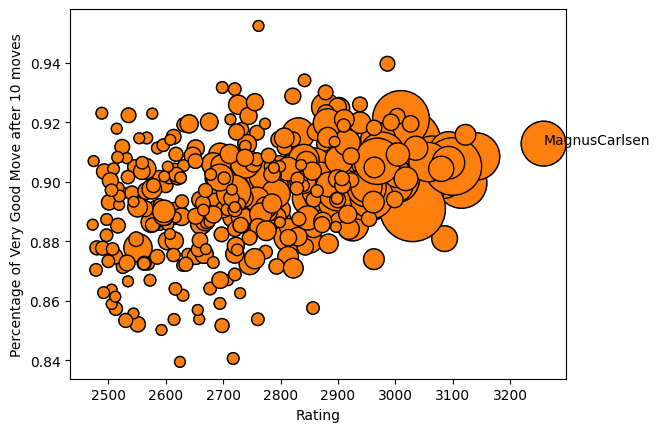

In [60]:

plt.scatter(df.loc[df.games > 5,"rating"], df.loc[df.games > 5,"very_good_move"], s= [10 * x for x in df.loc[df.games > 5,"games"].to_list()])
# Black outline for each marker
plt.scatter(df.loc[df.games > 5,"rating"], df.loc[df.games > 5,"very_good_move"], s= [10 * x for x in df.loc[df.games > 5,"games"].to_list()], edgecolors="black")
plt.ylabel("Percentage of Very Good Move after 10 moves")
plt.xlabel("Rating")
# For players with rating > 3000 add name
for i, txt in enumerate(df.loc[df.games > 5].index):
    if df.loc[df.games > 5,"rating"][i] > 3200:
        plt.annotate(txt, (df.loc[df.games > 5,"rating"][i], df.loc[df.games > 5,"very_good_move"][i]), fontsize=10)

In [26]:
import os
import time
import matplotlib.pyplot as plt

def get_num_files(directory):
    return len([name for name in os.listdir(directory) if os.path.isfile(os.path.join(directory, name))])

def beep():
    os.system('say "There is a problem in the Data Processing. Please take care, Dorian."')

def check_files(directory):
    file_counts = []
    while True:
        file_counts.append(get_num_files(directory))
        time.sleep(60)
        if get_num_files(directory) == file_counts[-1]:
            beep()
            print('No new files in the last minute. Please check the Data Processing.')
        if len(file_counts) % 10 == 0 and len(file_counts) > 10:
            # Number of files in last minute:
            num_files = file_counts[-1] - file_counts[-10]
            os.system(f'say "Everything is fine. {num_files} new files in last 10 minutes."')

check_files('../Data/Analysed')


KeyboardInterrupt: 

In [6]:
import json
from tqdm import tqdm
import requests
from bs4 import BeautifulSoup
import os
import requests

In [20]:
def downloadTournament(link, tournament):
    ht = requests.get(link)
    soup = BeautifulSoup(ht.content, 'html.parser')
    hrefs = soup.find_all('a', href=True)
    games = [x["href"] for x in hrefs if "game" in x['href']]
    for game in games:
        id = game.split("/")[-1]
        if os.path.exists("./Data/Games/{tournament}_{id}.json"):
            continue

        first_game = "https://www.chess.com/callback/live/game/" + id
        ht = requests.get(first_game)
        game_data = ht.json()
        with open(f"../Data/Games/{tournament}_{id}.json", "w") as f:
            json.dump(game_data, f)
    print("\033[Downloaded {} games\033[0m".format(len(games)))

link = "https://www.chess.com/tournament/live/late-titled-tuesday-blitz-september-12-2023-4265731"

In [11]:
tournaments = []

tournaments_link = f"https://www.chess.com/tournament/live/titled-tuesdays?&page="
for i in range(1,7):
    ht = requests.get(tournaments_link + str(i))
    soup = BeautifulSoup(ht.content, 'html.parser')
    hrefs = soup.find_all('a', href=True)
    links = [x["href"] for x in hrefs if "tournament" in x['href'] and "returnUrl" not in x["href"]]

    for url in set(links):
        if 'chess.com/tournament/live/' in url and 'titled-tuesday' in url:
            parts = url.split('/')
            name = parts[-1]
            date = '-'.join(name.split('-')[-4:-1])
            tournaments.append({'url': url, 'name': name, 'date': date})


In [21]:
for tournament in tournaments:
    downloadTournament(tournament['url'], tournament['name'])

ownloaded 350 games
ownloaded 350 games
ownloaded 350 games
ownloaded 349 games
ownloaded 349 games
ownloaded 350 games
ownloaded 350 games
ownloaded 350 games
ownloaded 350 games
ownloaded 0 games
ownloaded 349 games
ownloaded 350 games
ownloaded 350 games
ownloaded 350 games
ownloaded 350 games
ownloaded 350 games
ownloaded 349 games
ownloaded 349 games
ownloaded 350 games
ownloaded 346 games
ownloaded 348 games
ownloaded 350 games
ownloaded 349 games
ownloaded 350 games
ownloaded 350 games
ownloaded 348 games


KeyboardInterrupt: 